In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

data_train = pd.read_csv('TrainingDataset.csv')
data_test = pd.read_csv('TestDataset.csv')
data  = pd.concat((data_train,data_test))

Populating the interactive namespace from numpy and matplotlib


In [2]:
data.head()

,Cat_1,Cat_10,Cat_100,Cat_101,Cat_102,Cat_103,Cat_104,Cat_105,Cat_106,Cat_107,...,Quan_5,Quan_6,Quan_7,Quan_8,Quan_9,Quant_22,Quant_23,Quant_24,Quant_25,id
0,2,4,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,9.0,NaN,501
1,2,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,502
2,2,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,503
3,2,4,0,0,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,76.0,504
4,1,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,4.0,505


# Dropping ID which is not required for training the model

In [3]:
#data.drop('id',axis=1, inplace=True)
data.shape

(1270, 559)

In [4]:
print("To train , we have ", data_train.shape[0], "products in the training set and", 
      data_test.shape[0], "in the test set.")
print("In total we have", data_train.shape[0] + data_test.shape[0], " Products.")

To train , we have  751 products in the training set and 519 in the test set.
In total we have 1270  Products.


# Calculating Total percentage of Nan values in every attributes for data preprocessing and cleaning purpose 

In [5]:
data_of_nan = (data.isnull().sum() / data.shape[0]) * 100
print("\n\n Percentage of Nan values in our data are as follows : ")
data_of_nan=data_of_nan[data_of_nan>0]
data_of_nan



 Percentage of Nan values in our data are as follows : 


Date_2          0.236220
Outcome_M1     40.866142
Outcome_M10    48.346457
Outcome_M11    49.212598
Outcome_M12    49.685039
Outcome_M2     41.102362
Outcome_M3     41.259843
Outcome_M4     41.259843
Outcome_M5     42.755906
Outcome_M6     44.488189
Outcome_M7     45.354331
Outcome_M8     45.905512
Outcome_M9     46.692913
Quan_10        63.858268
Quan_11        63.858268
Quan_12        63.858268
Quan_13        63.858268
Quan_14        63.858268
Quan_15         1.889764
Quan_16        37.874016
Quan_17        43.070866
Quan_18        90.314961
Quan_19        74.015748
Quan_2          1.732283
Quan_20        94.094488
Quan_21        86.141732
Quan_22        97.480315
Quan_3          0.472441
Quan_4         10.629921
Quan_5         63.858268
Quan_6         63.858268
Quan_7         63.858268
Quan_8         63.858268
Quan_9         63.858268
Quant_22       91.259843
Quant_23       89.606299
Quant_24       53.779528
Quant_25       57.322835
dtype: float64

## list of attributes to be cleaned 

In [6]:

list_of_nulls = ['Outcome_M1', 'Outcome_M10', 'Outcome_M11', 'Outcome_M12', 'Outcome_M2',
       'Outcome_M3', 'Outcome_M4', 'Outcome_M5', 'Outcome_M6', 'Outcome_M7',
       'Outcome_M8', 'Outcome_M9', 'Quan_10', 'Quan_11', 'Quan_12', 'Quan_13',
       'Quan_14', 'Quan_15', 'Quan_16', 'Quan_17', 'Quan_18', 'Quan_19',
       'Quan_2', 'Quan_20', 'Quan_21', 'Quan_22', 'Quan_3', 'Quan_4', 'Quan_5',
       'Quan_6', 'Quan_7', 'Quan_8', 'Quan_9', 'Quant_22', 'Quant_23',
       'Quant_24', 'Quant_25']
data_of_nan.keys()

Index(['Date_2', 'Outcome_M1', 'Outcome_M10', 'Outcome_M11', 'Outcome_M12',
       'Outcome_M2', 'Outcome_M3', 'Outcome_M4', 'Outcome_M5', 'Outcome_M6',
       'Outcome_M7', 'Outcome_M8', 'Outcome_M9', 'Quan_10', 'Quan_11',
       'Quan_12', 'Quan_13', 'Quan_14', 'Quan_15', 'Quan_16', 'Quan_17',
       'Quan_18', 'Quan_19', 'Quan_2', 'Quan_20', 'Quan_21', 'Quan_22',
       'Quan_3', 'Quan_4', 'Quan_5', 'Quan_6', 'Quan_7', 'Quan_8', 'Quan_9',
       'Quant_22', 'Quant_23', 'Quant_24', 'Quant_25'],
      dtype='object')

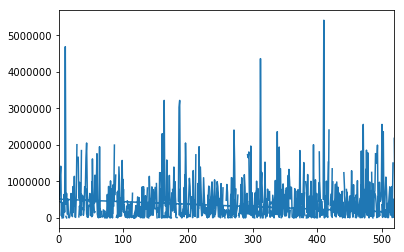

In [7]:
data['Quan_4'].describe()
data['Quan_4'].plot()


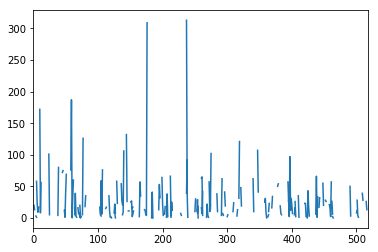

In [8]:
data['Quan_9'].plot()


In [9]:
print(" By seeing some of the graphs of quatitatives attributes , we have many outliers ")

 By seeing some of the graphs of quatitatives attributes , we have many outliers 


In [10]:
data['Quan_9'].describe()

count    459.000000
mean      28.997821
std       39.281900
min        0.000000
25%        4.000000
50%       16.000000
75%       38.000000
max      313.000000
Name: Quan_9, dtype: float64

# Fill in the missing values of quatitative attributes by median as it contains, more outliers as observed earlier

In [11]:
for var_col in list_of_nulls:
    if var_col.startswith("Qua"):
        temp = data[var_col].copy()
        temp = temp.fillna(temp.median())
        data[var_col] = temp

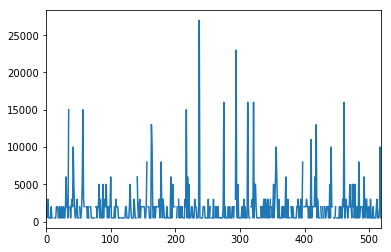

In [12]:
data['Outcome_M6'].plot()

## Filling in the missing values for outcomes

In [13]:
for var_outcome in list_of_nulls:
    if var_outcome.startswith("Out"):
        temp = data[var_outcome].copy()
        temp = temp.fillna(temp.median())
        data[var_outcome] = temp

In [14]:
data

,Cat_1,Cat_10,Cat_100,Cat_101,Cat_102,Cat_103,Cat_104,Cat_105,Cat_106,Cat_107,...,Quan_5,Quan_6,Quan_7,Quan_8,Quan_9,Quant_22,Quant_23,Quant_24,Quant_25,id
0,2,4,0,0,0,0,0,0,0,0,...,16.0,4.0,3.0,16.0,16.0,4.0,6.0,9.0,25.0,501
1,2,0,0,0,0,0,0,0,0,0,...,16.0,4.0,3.0,16.0,16.0,3.0,3.0,24.0,25.0,502
2,2,0,0,0,0,0,0,0,0,0,...,16.0,4.0,3.0,16.0,16.0,4.0,7.0,24.0,25.0,503
3,2,4,0,0,2,0,0,0,0,0,...,16.0,4.0,3.0,16.0,16.0,4.0,4.0,76.0,76.0,504
4,1,1,0,0,0,0,0,0,0,0,...,16.0,4.0,3.0,16.0,16.0,4.0,4.0,24.0,4.0,505
5,2,4,0,0,0,0,0,0,0,0,...,58.0,29.0,13.0,58.0,58.0,4.0,4.0,24.0,25.0,506
6,2,0,0,0,0,0,0,0,0,0,...,22.0,13.0,0.0,22.0,22.0,4.0,4.0,24.0,25.0,507
7,2,0,0,0,0,0,0,0,0,0,...,9.0,1.0,3.0,9.0,9.0,4.0,4.0,24.0,25.0,508
8,2,0,0,0,0,0,0,0,0,0,...,17.0,2.0,8.0,17.0,17.0,4.0,4.0,24.0,25.0,509
9,2,0,0,0,0,0,0,0,0,0,...,16.0,4.0,3.0,16.0,16.0,4.0,4.0,24.0,25.0,510


## Extracting the usefull information from date_1 and date_2

In [15]:
cols_date = ['Date_1','Date_2']

for date in cols_date:
    temp = data[date].copy()
    temp = temp.fillna(temp.median())
    data[date] = temp  

## Interpreting the days to launch a product or manufacturing duration

In [16]:
data['Days_to_launch']=data['Date_1']-data['Date_2']

In [17]:
data['Month_of_launch']=data['Date_1'] % 365

## Check for Redundant columns in the data

In [18]:
cols = data.columns

data.shape[1]

561

In [19]:
remove = []
cols = data.columns
for i in range(len(cols)-1):
    v = data[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,data[cols[j]].values):
            remove.append(cols[j])

remove=list(set(remove))

len(remove)

160

In [20]:
print("we have", len(remove)," columns which are redundant so , we will drop them ")

we have 160  columns which are redundant so , we will drop them 


In [21]:
data.drop(remove, axis=1, inplace=True)

In [22]:
print("After removeing we have ", data.shape[1] ," columns to train with ")

After removeing we have  401  columns to train with 


## Converting date of launch offset number into month

In [23]:
monthno = []

mlen = (31,28,31,30,31,30,31,31,30,31,30,31)

for currentmonth in range (len(mlen)):
        for day in range (mlen[currentmonth]):
                monthno += [currentmonth+1]
monthno = list(monthno)

In [24]:
vals = list(data['Month_of_launch'])
for i in range(data.shape[0]):
    tmp=vals[i]-1
    vals[i]=monthno[tmp]

In [25]:
import calendar as cl
cl.month_abbr[1]
for i in range(data.shape[0]):
    tmp=cl.month_abbr[vals[i]]
    vals[i]=tmp
    
data['Month_of_launch']=vals

## One hot encoding of Month of launch column

In [26]:
def monthencoder(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).lower()
        col_name = column_to_convert[:15] + '_' + cat_name[:3]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

data = monthencoder(df=data, column_to_convert="Month_of_launch")
data.drop("Month_of_launch", axis=1, inplace=True)

### WE found many categorical attributes have many unique numbers (int)  ,being used as arbitrary labels . 
### So one hot encoding of cat features 

In [29]:

def onehotencoder(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).lower()
        col_name = column_to_convert[:7] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

In [31]:
cat_list = list(data.columns)

for column in cat_list:
    if column.startswith("Cat"):
        data = onehotencoder(df=data, column_to_convert=column)
        data.drop(column, axis=1, inplace=True)
    

# Building Learning Model

In [32]:
names = ['Outcome_M1','Outcome_M2','Outcome_M3','Outcome_M4','Outcome_M5','Outcome_M6','Outcome_M7','Outcome_M8','Outcome_M9','Outcome_M10','Outcome_M11','Outcome_M12']


training_data=data_train
testing_data=data_test
data_new = data

data_new.set_index('id', inplace=True)

training_data.set_index('id', inplace=True)
#data_new = data_new.drop(names)
#training_data = pd.concat([training_data['Outcome_M1'], data_new], axis=1, join='inner')
i=training_data.shape[0]
data_new = data_new[:i]




#data_new.shape

yy = data_new['Outcome_M2']
XX = data_new.drop(names, axis=1, inplace=False)



## Building XGBregressor model

In [33]:
import xgboost as xg

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2,  
                                                    random_state=42)


max_depth = 3
min_child_weight = 10
subsample = 0.5
colsample_bytree = 0.6
objective = 'reg:linear'
num_estimators = 1000
learning_rate = 0.3

features = X_train
target = y_train
mdl = xg.XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)
mdl.fit(features, target)



/home/phani/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=10, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

In [34]:
predicted = mdl.predict(X_test)

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
#r2_score(predicted, y_test)
explained_variance_score(predicted, y_test) 

0.79705284857543135

In [35]:
pre = list(mdl.predict(XX))
pre

[2641.7996,
 7707.0698,
 20932.57,
 7673.1782,
 2280.9529,
 5916.2778,
 3267.4832,
 6112.8369,
 2988.1753,
 1295.2356,
 2434.95,
 329.32288,
 4890.2466,
 339.00946,
 9960.5117,
 412.41559,
 3071.3745,
 2217.6748,
 1706.8287,
 5948.7783,
 2147.4751,
 6179.2012,
 695.84381,
 13059.844,
 2114.5273,
 828.71185,
 1706.7966,
 153.15935,
 1981.1343,
 379.02112,
 14257.82,
 2756.1367,
 2133.9719,
 7627.3281,
 1913.4379,
 10404.833,
 42005.871,
 2330.9211,
 479.32648,
 13651.885,
 15104.389,
 18023.734,
 39621.867,
 17922.0,
 5827.1865,
 1767.4718,
 2301.2078,
 5251.4097,
 3556.1753,
 -111.42344,
 2115.4675,
 61198.504,
 1951.7766,
 19267.299,
 2052.7229,
 7611.7212,
 15138.89,
 9891.6162,
 29400.205,
 6209.5107,
 2629.0576,
 3008.1787,
 12909.17,
 19868.85,
 2801.6401,
 3352.2944,
 6552.1636,
 735.34711,
 383.64798,
 2742.9026,
 2018.1531,
 636.07391,
 -4192.791,
 1478.8324,
 545.67627,
 767.00977,
 9615.2246,
 30950.275,
 3009.6328,
 -109.62259,
 2035.0876,
 2338.3484,
 18118.773,
 1863.3496,

## Model try 2

In [322]:
from sklearn.model_selection import train_test_split  
from xgboost.sklearn import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3,  
                                                    random_state=42)
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor(nthread=-1)  

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(X_train, y_train) 



ans = gs.predict(X_test)

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
r2_score(ans, y_test)
#explained_variance_score(ans, y_test) 

0.46021355100460803